# Figure 2 - figure supplement 2C

In [1]:
# required libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def plot_create():
    #plt.title('Predicted normalized trajectories: Scaling', y=1.05, size=65)    
    plt.xlabel('Time (days)')
    plt.ylabel('Normalized position')
    plt.xlim(tau_mean/24,8)
    plt.ylim(-0.2,1.2)    
    fig.set_size_inches(18.5, 12.5)
    plt.rcParams.update({'font.size': 42})
    filename = "./" + "Fig_3C.png"    
    fig.savefig(filename, dpi=300, bbox_inches='tight')    

In [3]:
n0_mean,n0_std = 196,2 # n0 mean and standar deviation
l_mean,l_std = 828,30      # lambda mean and standar deviation
tau_mean,tau_std = 85,12   # tau mean and standar deviation

root = "../main/simulations/"
model = 'switchpoint/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

all_seeds = []
files = os.listdir(path)
for seed in files:    
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    outgrowth = data['0']
    all_seeds.append(outgrowth)
all_seeds = pd.concat(all_seeds, ignore_index=True, axis=1)
all_seeds = all_seeds.dropna()
df_mean = np.asarray(all_seeds.mean(axis=1))
df_std = np.asarray(all_seeds.std(axis=1))
time = outgrowth.index/24

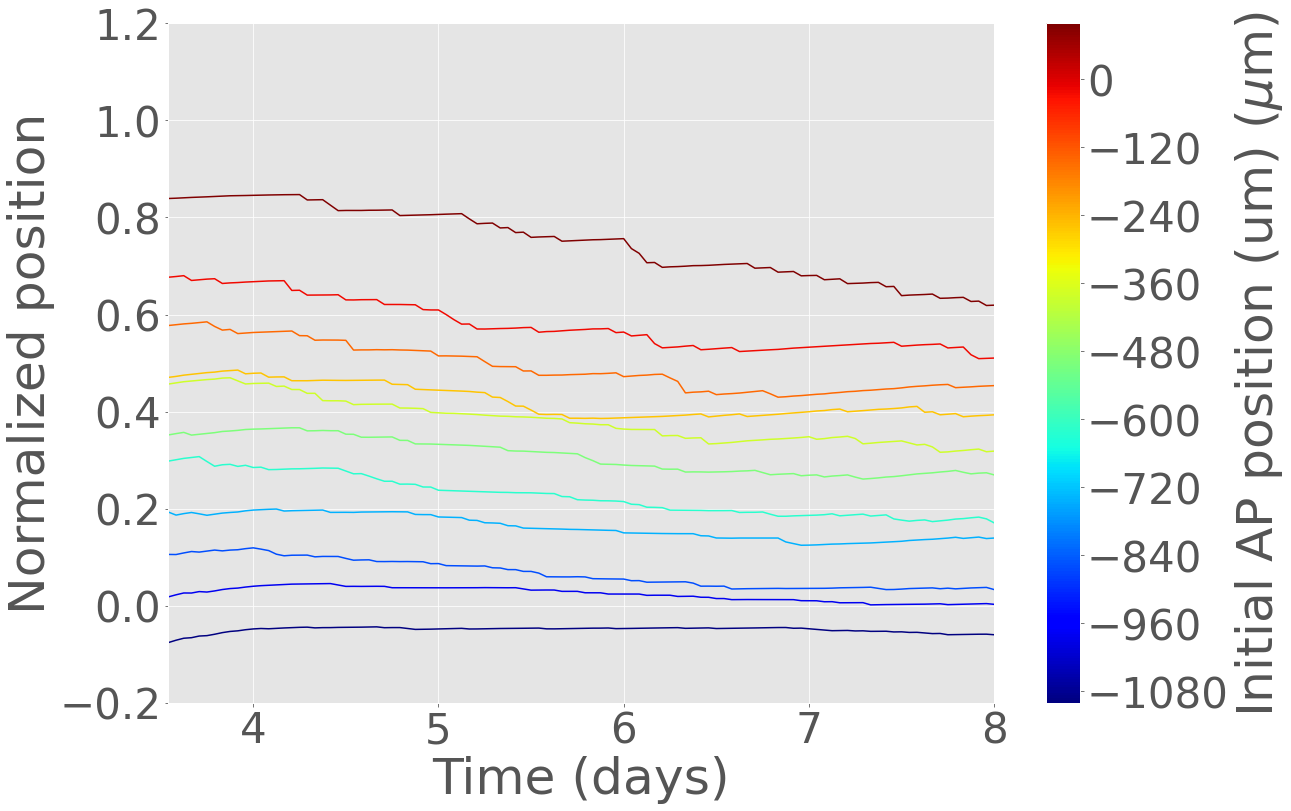

In [5]:
# run parameters    
n0_mean,n0_std = 196,2 # n0 mean and standar deviation
l_mean,l_std = 828,30      # lambda mean and standar deviation
tau_mean,tau_std = 85,12   # tau mean and standar deviation

root = "../main/simulations/"
model = 'outgrowth/'
parameters = 'n0='+str(n0_mean)+'\n'+'l='+str(l_mean)+'\n'+'tau='+str(tau_mean)+'/'
path = root+model+parameters

all_seeds = []
files = os.listdir(path)
for seed in files:    
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    data.set_index(['time', 'id','clone'], inplace=True)
    tracks = data.groupby(['time','clone'])['position'].mean()
    all_seeds.append(tracks)
all_seeds = pd.concat(all_seeds, ignore_index=True, axis=1)
tracks_mean = all_seeds.mean(axis=1)
time = tracks.reset_index()['time'].unique()/24

all_seeds = []
files = os.listdir(path)
for seed in files:    
    opened_file = open(path+seed)
    data = pd.read_csv(opened_file, delimiter=',')
    data.set_index(['time', 'id'], inplace=True)
    outgrowth = data.groupby(level='time')['position'].max()
    all_seeds.append(outgrowth)
all_seeds = pd.concat(all_seeds, ignore_index=True, axis=1)
outgrowth_mean = np.asarray(all_seeds.mean(axis=1))
outgrowth_mean = outgrowth_mean[np.logical_not(np.isnan(outgrowth_mean))]

clones = np.arange(1,83,8)   

fig = plt.figure()
ax1 = fig.add_subplot(111)

lt = outgrowth_mean
sp = df_mean
colors = cm.jet(np.linspace(0,1,len(clones)))
for cloneID,color in zip(clones,colors[::-1]):
    xt = tracks_mean.xs(cloneID,level='clone')
    ax1.plot(time, (xt-sp)/(lt-sp), color=color)
    
sm = cm.ScalarMappable(cmap='jet')
sm.set_array([])
plt.colorbar(sm, boundaries=np.arange(-1100,100),label='Initial AP position (um)'+ ' (' + r'$\mu$'+'m)')
plot_create()